https://en.wikipedia.org/wiki/International_Chemical_Identifier

- identificador de sustancias químicas, diseñado para proporcionar una forma estándar y legible de codificar la información molecular y para facilitar la búsqueda de información en bases de datos y en la web.
- The first, main, layer of the InChI refers to this core parent structure, giving its chemical formula, non-hydrogen connectivity without bond order (/c sublayer) and hydrogen connectivity (/h sublayer.) The /q portion of the charge layer gives its charge, and the /p portion of the charge layer tells how many protons (hydrogen ions) must be added to or removed from it to regenerate the original structure. If present, the stereochemical layer, with sublayers /b, /t, /m and /s, gives stereochemical information, and the isotopic layer /i (which may contain sublayers /h, /b, /t, /m and /s) gives isotopic information. These are the only layers which can occur in a standard InChI.
- Every InChI starts with the string "InChI=" followed by the version number, currently 1. If the InChI is standard, this is followed by the letter S for standard InChIs, which is a fully standardized InChI flavor maintaining the same level of attention to structure details and the same conventions for drawing perception. 

In [1]:
import os
from pathlib import Path

path = Path('data')
os.listdir(path)

['sample_submission.csv', 'test', 'train', 'train_labels.csv']

In [2]:
import pandas as pd

train_labels = pd.read_csv(path / 'train_labels.csv')
train_labels

,image_id,InChI
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...
...,...,...
2424181,ffffe824f539,InChI=1S/C10H12F2N2O3/c1-17-7-2-5(3-8(15)16)9(...
2424182,ffffea1ebdfa,InChI=1S/C19H20F2N4O3S/c1-10(8-20)28-14-7-12(2...
2424183,ffffee2b4534,InChI=1S/C22H26Cl2N2O4S/c1-16-6-2-3-10-21(16)3...
2424184,fffff0b6eea6,InChI=1S/C17H26N2O6S/c1-23-16-12-14(4-5-15(16)...


In [3]:
train_labels.InChI[0]

'InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3'

In [3]:
train_labels.isna().sum()

image_id    0
InChI       0
dtype: int64

In [4]:
from tqdm import tqdm

lenghts = train_labels.InChI.map(len)

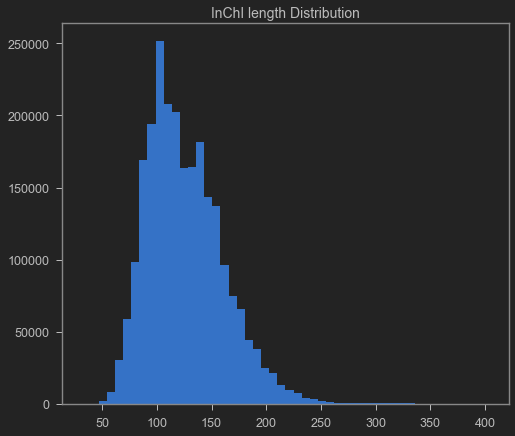

In [5]:
plt.hist(lenghts, bins=50)
plt.title("InChI length Distribution", fontsize=14);
plt.show()

In [6]:
lenghts.max(), lenghts.min()

(403, 32)

In [7]:
parts = train_labels.InChI.map(lambda x: x.split('/'))

In [8]:
parts_lengths = parts.map(len)
parts_lengths.max(), parts_lengths.min()

(11, 3)

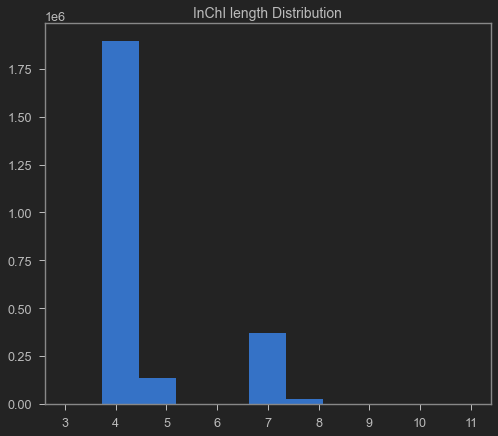

In [9]:
plt.hist(parts_lengths, bins=11)
plt.title("InChI length Distribution", fontsize=14);
plt.show()

In [10]:
parts_lengths.value_counts()

4     1893702
7      371839
5      133623
8       24162
6         398
3         307
9         127
10         27
11          1
Name: InChI, dtype: int64

In [11]:
parts_lengths.value_counts()*100 / len(parts_lengths)

4     78.117026
7     15.338716
5      5.512077
8      0.996706
6      0.016418
3      0.012664
9      0.005239
10     0.001114
11     0.000041
Name: InChI, dtype: float64

In [12]:
part1 = parts.map(lambda x: x[0])
part1.unique(), part1.mode()

(array(['InChI=1S'], dtype=object),
 0    InChI=1S
 dtype: object)

In [13]:
part2 = parts.map(lambda x: x[1])

In [14]:
len(part2.unique())

329768

In [15]:
part2.value_counts()[:10].sort_values(ascending=False)

C15H22N2O2    1391
C16H24N2O2    1312
C14H20N2O2    1214
C17H26N2O2    1102
C14H22N2O2    1065
C16H22N2O3    1043
C15H24N2O2    1040
C16H26N2O     1014
C15H24N2O     1012
C15H22N2O3    1006
Name: InChI, dtype: int64

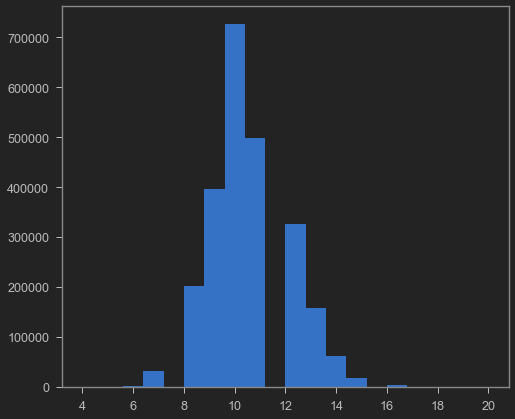

(20, 4)

In [16]:
part2_lengths = part2.map(len)
plt.hist(part2_lengths, bins=20)
plt.show()
part2_lengths.max(), part2_lengths.min()

In [17]:
part2_lengths.value_counts(), part2_lengths.value_counts()*100 / len(part2_lengths)

(10    725832
 11    498981
 9     395756
 12    326218
 8     202800
 13    157428
 14     61322
 7      31651
 15     17703
 16      3903
 6       1899
 17       551
 18        64
 5         62
 19        10
 4          4
 20         2
 Name: InChI, dtype: int64,
 10    29.941267
 11    20.583445
 9     16.325315
 12    13.456806
 8      8.365695
 13     6.494056
 14     2.529591
 7      1.305634
 15     0.730266
 16     0.161002
 6      0.078336
 17     0.022729
 18     0.002640
 5      0.002558
 19     0.000413
 4      0.000165
 20     0.000083
 Name: InChI, dtype: float64)

In [18]:
part3 = parts.map(lambda x: x[2])
len(part3.unique()), part3.value_counts()[:10].sort_values(ascending=False)

(2359241,
 c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18(19)20                                                                                                                                           40
 c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20(21)22                                                                                                                                     26
 c1-13(22)17-6-7-18-16-5-4-14-12-15(23)8-10-20(14,2)19(16)9-11-21(17,18)3                                                                                                                      25
 c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22(23)24                                                                                                                               22
 c1-18-9-7-13(20)11-12(18)3-4-14-15-5-6-17(21)19(15,2)10-8-16(14)18                                                                                                                            18
 c1-4-7-10-13-16-19-

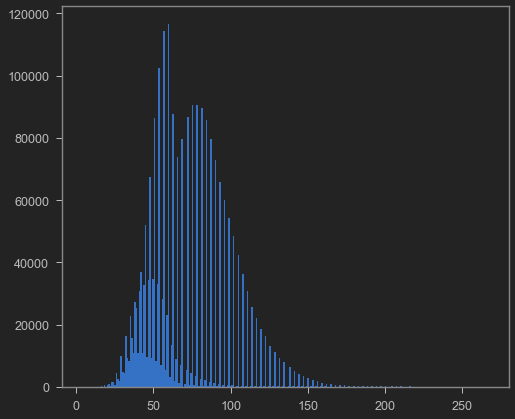

(267, 4)

In [19]:
part3_lengths = part3.map(len)
plt.hist(part3_lengths, bins=part3_lengths.max())
plt.show()
part3_lengths.max(), part3_lengths.min()

In [20]:
part3_lengths.value_counts(), part3_lengths.value_counts()*100 / len(part3_lengths)

(60     116474
 57     114208
 54     102616
 78      90565
 75      90477
         ...  
 200         1
 209         1
 215         1
 218         1
 4           1
 Name: InChI, Length: 192, dtype: int64,
 60     4.804664
 57     4.711190
 54     4.233009
 78     3.735893
 75     3.732263
          ...   
 200    0.000041
 209    0.000041
 215    0.000041
 218    0.000041
 4      0.000041
 Name: InChI, Length: 192, dtype: float64)

In [21]:
part4 = parts.map(lambda x: x[3] if len(x) > 3 else None)
len(part4.unique()), part4.value_counts()[:10].sort_values(ascending=False)

(1497256,
 h2-8H,1H3       1257
 h2-7H,1H3       1170
 h3-8H,1-2H3     1136
 h2-9H,1H3       1113
 h2-6H,1H3       1084
 h3-10H,1-2H3    1070
 h3-7H,1-2H3     1038
 h2-10H,1H3      1037
 h3-6H,1-2H3     1037
 h2-5H,1H3       1036
 Name: InChI, dtype: int64)

In [22]:
# basline: inchi más común

In [23]:
sample_submission = pd.read_csv(path / 'sample_submission.csv')
sample_submission

,image_id,InChI
0,00000d2a601c,InChI=1S/H2O/h1H2
1,00001f7fc849,InChI=1S/H2O/h1H2
2,000037687605,InChI=1S/H2O/h1H2
3,00004b6d55b6,InChI=1S/H2O/h1H2
4,00004df0fe53,InChI=1S/H2O/h1H2
...,...,...
1616102,ffffcdb2e39e,InChI=1S/H2O/h1H2
1616103,ffffcfddd770,InChI=1S/H2O/h1H2
1616104,ffffe4ab06b2,InChI=1S/H2O/h1H2
1616105,ffffec4033ec,InChI=1S/H2O/h1H2


In [24]:
most_freq_part1 = part1.mode().values[0]
most_freq_part2 = part2.mode().values[0]
most_freq_part3 = part3.mode().values[0]
most_freq_part4 = part4.mode().values[0]

most_freq_inchi = f'{most_freq_part1}/{most_freq_part2}/{most_freq_part3}/{most_freq_part4}'
most_freq_inchi

'InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18(19)20/h2-8H,1H3'

In [25]:
sample_submission.InChI = most_freq_inchi
sample_submission

,image_id,InChI
0,00000d2a601c,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
1,00001f7fc849,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
2,000037687605,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
3,00004b6d55b6,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
4,00004df0fe53,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
...,...,...
1616102,ffffcdb2e39e,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
1616103,ffffcfddd770,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
1616104,ffffe4ab06b2,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...
1616105,ffffec4033ec,InChI=1S/C15H22N2O2/c1-2-3-4-5-6-7-8-9-10-11-1...


In [26]:
sample_submission.to_csv('submission.csv', index=False)

In [27]:
#!kaggle competitions list
#!kaggle competitions submit bms-molecular-translation -f submission.csv -m "most frequent"

Successfully submitted to Bristol-Myers Squibb – Molecular Translation



  0%|          | 0.00/151M [00:00<?, ?B/s]
  0%|          | 96.0k/151M [00:00<02:49, 936kB/s]
  2%|1         | 2.79M/151M [00:01<02:12, 1.17MB/s]
  4%|3         | 5.45M/151M [00:01<01:32, 1.64MB/s]
 12%|#2        | 18.4M/151M [00:01<00:59, 2.34MB/s]
 18%|#7        | 26.6M/151M [00:01<00:39, 3.30MB/s]
 23%|##2       | 34.1M/151M [00:01<00:26, 4.63MB/s]
 27%|##6       | 40.2M/151M [00:01<00:18, 6.42MB/s]
 31%|###       | 46.4M/151M [00:02<00:17, 6.42MB/s]
 36%|###5      | 53.9M/151M [00:02<00:11, 8.87MB/s]
 39%|###9      | 59.3M/151M [00:02<00:08, 10.8MB/s]
 44%|####4     | 66.7M/151M [00:03<00:06, 14.6MB/s]
 48%|####7     | 72.1M/151M [00:03<00:05, 16.5MB/s]
 52%|#####2    | 78.8M/151M [00:03<00:03, 21.4MB/s]
 57%|#####7    | 86.3M/151M [00:03<00:02, 27.4MB/s]
 61%|######    | 92.1M/151M [00:03<00:02, 26.9MB/s]
 65%|######4   | 97.8M/151M [00:03<00:01, 32.2MB/s]
 68%|######8   | 103M/151M [00:04<00:01, 30.2MB/s] 
 73%|#######2  | 110M/151M [00:04<00:01, 36.9MB/s]
 76%|#######6  | 115M/